## Company Bankruptcy Prediction

## Table of Contents

<ul>
    <li><a href='#intro'>Introduction</a></li>
    <li><a href='#wrangle'>Data Wrangling</a></li>
    <li><a href='#eda'>Exploratory Data Analysis</a></li>
    <li><a href='#conclusion'>Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

<a id='wrangle'></a>
## Data Wrangling

In [28]:
# Import packages

## general packages
import os
import numpy as np
import pandas as pd

## Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.transform import factor_cmap, jitter
from bokeh.layouts import row

## Machine learning
import time
from sklearn.model_selection import train_test_split
### Oversampling
from imblearn.over_sampling import SMOTE
### LightGBM
import lightgbm as lgb
### Metrics
from sklearn.metrics import roc_auc_score, precision_score, classification_report
### Feature Selection
import shap

In [29]:
# Upload dataset
df = pd.read_csv('data.csv')
df

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [30]:
df2=df.copy()

In [31]:
df2['Bankrupt?'].replace({0:'No', 1: 'Yes'}, inplace=True)
df2

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,Yes,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,Yes,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,Yes,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,Yes,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,Yes,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,No,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,No,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,No,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,No,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [32]:
df3=df['Bankrupt?'].copy()
normalized_df=(df-df.mean())/df.std()
normalized_df['Bankrupt?']=df3
normalized_df

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,-2.217747,-2.045648,-2.400185,-0.383306,-0.382610,0.016455,-0.023514,-0.020163,-0.087472,...,-2.254152,-0.049487,-0.084268,-0.383437,-0.861548,0.680121,-0.060026,-0.098971,0.0,-0.622022
1,1,-0.673779,-0.311045,-0.598406,0.135058,0.136297,0.014669,0.014798,0.015965,-0.005956,...,-0.309011,-0.049487,-0.021387,0.135243,-0.029802,0.240667,15.128707,0.364532,0.0,-0.535534
2,1,-1.303576,-0.908353,-1.319813,-0.383731,-0.388148,0.007857,-0.061107,-0.051179,-0.142227,...,-0.820449,-0.049487,-0.005984,-0.383670,-0.249802,0.679197,-0.062957,-0.125006,0.0,-0.621914
3,1,-1.735759,-1.636089,-1.556226,-1.441312,-1.441726,-0.004257,-0.017312,-0.008676,-0.024490,...,-1.691098,-0.049487,-0.080220,-1.441420,-0.392835,0.093758,-0.053899,-0.052558,0.0,-0.471791
4,1,-0.661729,-0.307722,-0.508013,-0.541198,-0.540668,0.016757,0.013702,0.016185,-0.013253,...,-0.315985,-0.049487,-0.032050,-0.541215,-0.029562,-0.128005,-0.178024,0.776338,0.0,-0.241697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,-0.189381,-0.291938,-0.168169,-0.206262,-0.204954,0.018213,0.017034,0.018195,-0.010092,...,-0.194217,-0.049487,-0.024009,-0.206201,-0.002968,-0.052520,-0.030435,0.063210,0.0,-0.353667
6815,0,-0.494640,-0.310214,-0.477592,-0.569287,-0.568786,0.018222,0.017454,0.017918,-0.009247,...,-0.198645,-0.049487,0.001317,-0.569292,-0.006633,-0.154393,-0.033989,0.049966,0.0,-0.185842
6816,0,-0.534806,-0.379166,-0.534957,0.147400,0.135019,0.017627,0.016411,0.017152,-0.009918,...,-0.247498,-0.049487,0.019651,0.147294,-0.018165,-0.316423,-0.047866,-0.015100,0.0,1.001133
6817,0,0.017874,0.019593,0.007402,-0.005811,-0.004719,0.024492,0.024097,0.023221,-0.011174,...,0.100359,-0.049487,0.003492,-0.005930,0.046930,-0.194837,-0.045894,-0.004270,0.0,-0.071359


There are 95 variables describing the condition of companies, plus one column "Bankrupt?" as the label.

The number of records is 6819.

Next, I'll check the existence of replicates and null values.

In [33]:
# check duplicates
df.duplicated().sum()

0

In [34]:
# check null values
df.isnull().any().any()

False

In [35]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [36]:
df['Bankrupt?'] = df['Bankrupt?'].astype('category')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype   
---  ------                                                    --------------  -----   
 0   Bankrupt?                                                 6819 non-null   category
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64 
 2    ROA(A) before interest and % after tax                   6819 non-null   float64 
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64 
 4    Operating Gross Margin                                   6819 non-null   float64 
 5    Realized Sales Gross Margin                              6819 non-null   float64 
 6    Operating Profit Rate                                    6819 non-null   float64 
 7    Pre-tax net Interest Rate                                6819 non-null   float64 
 8    After-t

### Oversampling

In [38]:
labels = df['Bankrupt?'].value_counts()
labels.index=['No', 'Yes']
labels

No     6599
Yes     220
Name: Bankrupt?, dtype: int64

To solve the unbalance of labels, I'll use SMOTE algorithm to oversample the minority class.

In [39]:
ori_X = df.drop(['Bankrupt?'], axis=1)
ori_y = df['Bankrupt?']

oversample = SMOTE()
X, y = oversample.fit_resample(ori_X, ori_y)

In [40]:
new_labels = y.value_counts()
new_labels.index = ['No', 'Yes']
new_labels

No     6599
Yes    6599
Name: Bankrupt?, dtype: int64

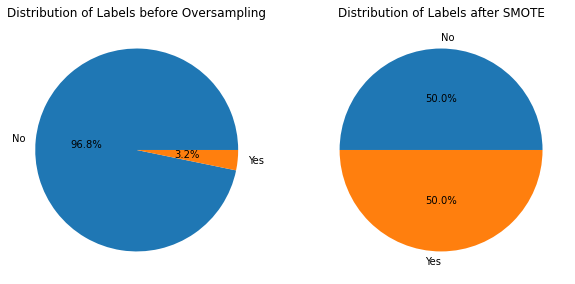

In [41]:
fig = plt.figure(figsize=[10, 6])
gs = fig.add_gridspec(1, 2)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

ax0.pie(labels, labels=labels.index, pctdistance=0.5, autopct='%.1f%%')
ax1.pie(new_labels, labels=new_labels.index, pctdistance=0.5, autopct='%.1f%%')

ax0.set_title('Distribution of Labels before Oversampling')
ax1.set_title('Distribution of Labels after SMOTE');

<a id='eda'></a>
## Exploratory Data Analysis

### Modeling

Use Scikit-learn API:

In [42]:
# Split data into random train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize the LGBMClassifier
lgbm = lgb.LGBMClassifier(boosting_type='gbdt',
                          num_leaves=80,
                          max_depth=10,
                          learning_rate=0.03,
                          objective='binary',
                          force_col_wise=True,
                          metric='binary_logloss')

# Fit
lgbm.fit(X_train, y_train)

LGBMClassifier(force_col_wise=True, learning_rate=0.03, max_depth=10,
               metric='binary_logloss', num_leaves=80, objective='binary')

In [43]:
y_pred = lgbm.predict(X_test)
y_pred = y_pred.round(0)
y_pred = y_pred.astype(int)

In [44]:
roc_auc_score(y_pred, y_test)

0.9801395715787368

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      1300
           1       0.97      0.99      0.98      1340

    accuracy                           0.98      2640
   macro avg       0.98      0.98      0.98      2640
weighted avg       0.98      0.98      0.98      2640



### Feature selection

In [46]:
# Load JS visualization code
shap.initjs()

# Explain the model's predictions using SHAP
explainer = shap.TreeExplainer(lgbm)
shap_values = explainer.shap_values(X_train)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


In [47]:
shap_values[1].shape

(10558, 95)

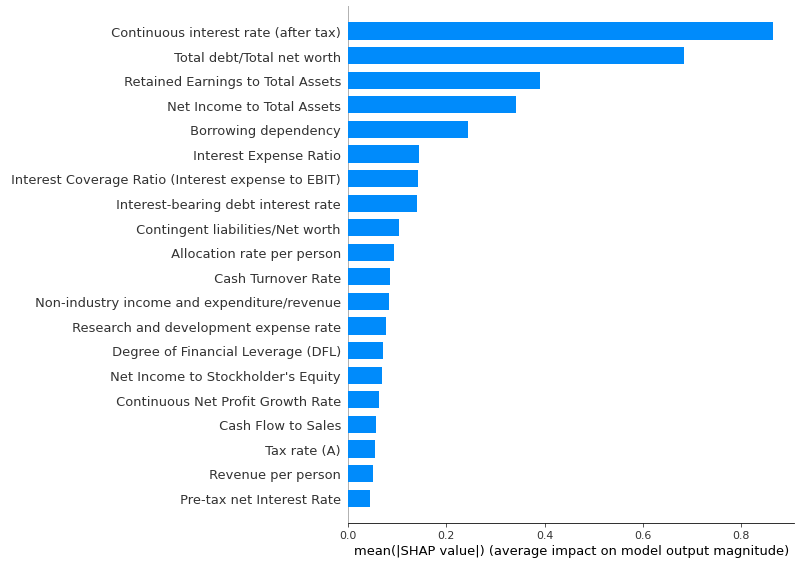

In [48]:
shap.summary_plot(shap_values[1], features=X_train, feature_names=X_train.columns, plot_type='bar')

This plot shows the importance of features in a descending order. For example, the top feature "Continuous interest rate" contribute more to the model than the second feature "Total debt/total net worth". To figure out the relationships between features and labels,I plotted the effect of these features on all records in the training data as shown below:

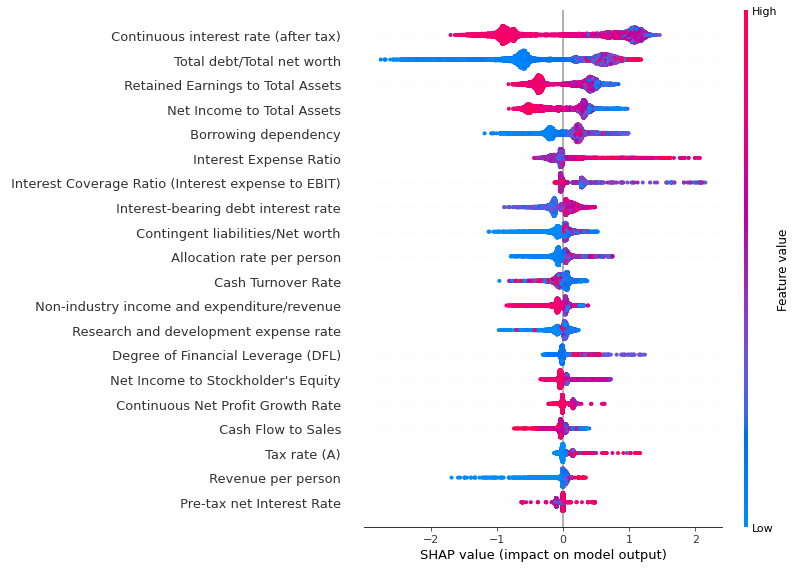

In [49]:
shap.summary_plot(shap_values[1], features=X_train, feature_names=X_train.columns)

This plot shows the positive and negative relationships of the features with the label. Similarly, features are ranked in descending order. Each dot represents one record in the training data. The color represents the value of the feature (red high, blue low). The horizontal axis represents the effect of feature on model prediction. For example, high continuous interest rate lowers the probability that model predict bankrupt. There is a negative relationship between continuous interest rate with bankrupt.

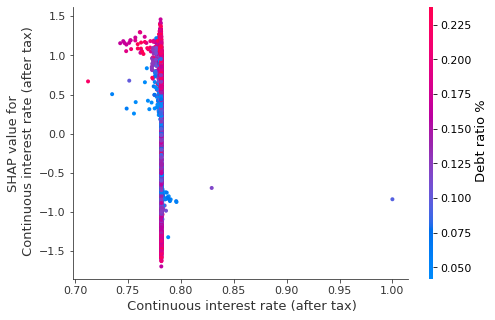

In [50]:
shap.dependence_plot(' Continuous interest rate (after tax)', shap_values[1], X_train)

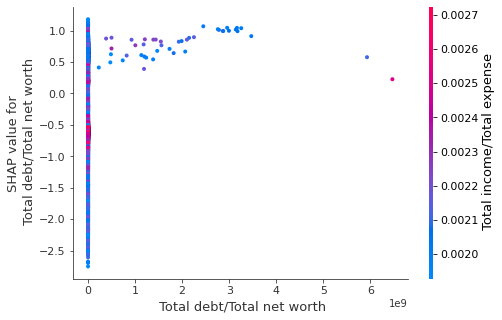

In [51]:
shap.dependence_plot(' Total debt/Total net worth', shap_values[1], X_train)

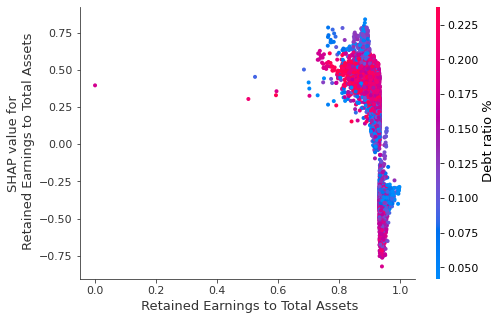

In [52]:
shap.dependence_plot(' Retained Earnings to Total Assets', shap_values[1], X_train)

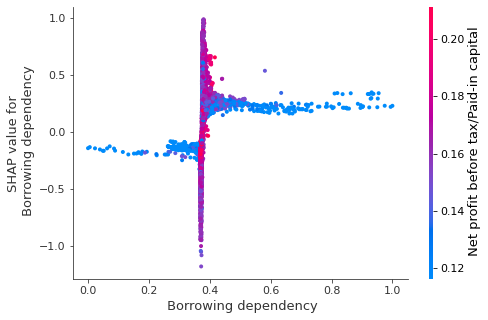

In [53]:
shap.dependence_plot(' Borrowing dependency', shap_values[1], X_train)

In [54]:
shap.force_plot(explainer.expected_value[1], shap_values[1][0,:], X_train.iloc[0,:])

In [55]:
shap.force_plot(explainer.expected_value[1], shap_values[1][1,:], X_train.iloc[1,:])

In [56]:
y_train

3089     0
11045    1
419      0
12871    1
4704     0
        ..
343      0
9453     1
9940     1
9218     1
3269     0
Name: Bankrupt?, Length: 10558, dtype: category
Categories (2, int64): [0, 1]

In [61]:
c = X_train.columns
c

Index([' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit Growth Rate'

### Visualization

First, let's take a look at the relationship between the top two variables: 
  - Continuous interest rate
  - Total debt/ Total net worth

In [58]:
output_notebook()

Loading BokehJS ...

In [59]:
# figure1
p1 = figure(plot_width=500, plot_height=500)

colormap = {0:'green', 1: 'red'}
colors= [colormap[x] for x in df['Bankrupt?']]

p1.circle(df[' Continuous interest rate (after tax)'], 
         df[' Total debt/Total net worth'], 
         size=10, line_color='black', fill_color=colors, fill_alpha=0.2)

p1.xaxis.axis_label='Continuous interest rate (after tax)'
p1.yaxis.axis_label='Total debt/Total net worth'

#figure2
p2 = figure(plot_width=500, plot_height=500)

colormap = {0:'green', 1: 'red'}
colors= [colormap[x] for x in df['Bankrupt?']]

p2.circle(df[' Continuous interest rate (after tax)'], 
         df[' Retained Earnings to Total Assets'], 
         size=10, line_color='black', fill_color=colors, fill_alpha=0.2)

p2.xaxis.axis_label='Continuous interest rate (after tax)'
p2.yaxis.axis_label='Retained Earnings to Total Assets'


show(row(p1, p2))